<a href="https://colab.research.google.com/github/geiner28/Api-Archivos/blob/main/guias/Guia_IntroMapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercitando con Hadoop MapReduce y Python

El objetivo de esta guía es trabajar con la resolución de ejercicios siguiendo el modelo de programación MapReduce con Python para entender los principales fundamentos de MapReduce para dar soporte a la computación paralela sobre grandes colecciones de datos en un contexto de procesamiento distribuido.
<br />

## Hadoop

El crecimiento exponencial en la disponibilidad de datos genera dos desafíos fundamentales: la necesidad de almacenamiento y su procesamiento eficiente. En pocas palabras, Hadoop afronta estos desafíos a través de las siguientes herramientas: una plataforma confiable y escalable para almacenamiento distribuido (HDFS) y análisis de estos datos (MapReduce).

A su vez, Apache Hadoop se ejecuta en hardware commodity y es de código abierto.
<br />
<br />

### Hadoop HDFS

El primer problema a resolver es la falla del hardware puesto es normal que el mismo falle cuando se lo utiliza con intensidad. Una forma común de evitar la pérdida de datos es mediante la replicación: el sistema de archivos guarda copias redundantes de los datos para que, en caso de falla, haya otra copia disponible. En el ecosistema Hadoop, el encargado de afrontar este desafío es su sistema de archivos distribuido de Hadoop (HDFS).
<br />
<br />

### MapReduce

El segundo problema es que la mayoría de las tareas de análisis deben poder combinar los datos de alguna manera, y es posible que los datos leídos de un disco deban combinarse con los datos de otros. MapReduce proporciona un modelo de programación que abstrae el problema de las lecturas y escrituras de disco, transformándolo en un cálculo sobre conjuntos de claves y valores. Para ello, MapReduce combina su operatoria en dos partes en el cálculo: el mapeo y la reducción, y es la interfaz entre las dos donde ocurre la "mezcla".

MapReduce es un procesador de consultas _batch_, con capacidad de ejecutar una consulta ad hoc en todo un conjunto de datos, del orden de los petabytes, y obtener resultados en un tiempo razonable.





## Programando en modo MapReduce

__Ejercicio: Vamos a programar un proceso MapReduce que nos permita realizar un conteo de palabras para saber, en un supuesto dataset del orden de los petabytes, la cantidad de veces que aparece cada palabra.__
<br /> <br />

Vamos a emular el funcionamiento de Hadoop MapReduce en función del siguiente esquema de funcionamiento [1]:

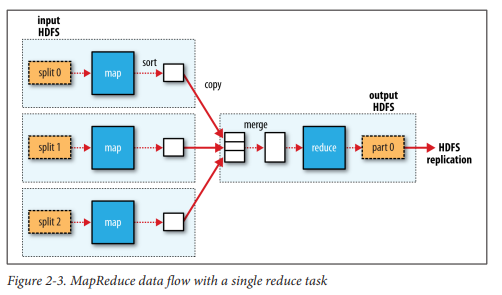

En resumen, en el siguiente ejercicio, vamos a hacer un conteo de palabras en función de la siguiente operatoria:
1. Vamos a suponer que tenemos 3 nodos que se distribuyen los datos en 3 split de datos diferentes.
1. En cada nodo se va a procesar un split diferente, transformando cada palabra a un par __<clave, valor>__ (el separador será el _tab_).
1. Luego, tendremos un sorter.py que ordenará las claves emulando la operación de Hadoop que realiza esta actividad automáticamente.
1. Luego habrá un merger que mezclará los archivos procesados en cada nodo emulando a Hadoop que realiza esta operación automáticamente.
1. En este ejercicio vamos a suponer que tenemos un único Reducer.
1. Por último, habrá un reducer.py que integrará los datos en un único archivo de salida que tendrá el procesamiento final de los datos.

En resumen, el flujo de datos puede observarse en el siguiente esquema: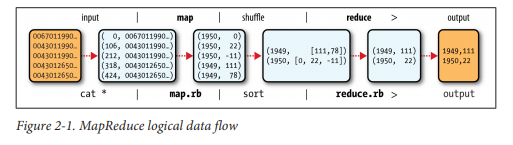

### Mapper

Cada mapper leerá un split de datos y lo procesará. El objetivo de esta actividad es convertir la entrada en un par __<clave, valor>__ que permita resolver el problema. Como lo que buscamos es realizar un conteo de palabras para saber, en un supuesto dataset del orden de los petabytes, la cantidad de veces que aparece cada palabra, vamos a tomar como clave la palabra y al valor le asignaremos 1 que indicará la ocurrencia de esa palabra.

In [ ]:
#!/usr/bin/env python
"""mapper.py"""

# Leemos el archivo
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_split1.txt

import sys

# Archivo de ejemplo
file_hdfs = open("mr_split1.txt")

# input comes from STDIN (standard input)
# for line in sys.stdin:

# Para el ejemplo vamos a leer desde un archivo
for line in file_hdfs:
    # Se eliminan los espacios en blanco iniciales y finales
    line = line.strip()
    # Separo la linea en palabras
    words = line.split()
    # Incremento contadores
    for word in words:
        # Se escriben los resultados en STDOUT (salida estándar);
        # Lo que procese cada mapper será la entrada para el reducer.py
        # Lo pasamos delimitado por tabulaciones
        print(word, '\t', 1)

# Cierro el archivo
file_hdfs.close()

--2020-11-01 14:33:56--  https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_split1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606 [text/plain]
Saving to: ‘mr_split1.txt.1’

mr_split1.txt.1     100%[===================>]     606  --.-KB/s    in 0s      

2020-11-01 14:33:56 (18.9 MB/s) - ‘mr_split1.txt.1’ saved [606/606]

Aunque 	 1
recién 	 1
iniciará 	 1
la 	 1
octava 	 1
fecha 	 1
del 	 1
torneo, 	 1
el 	 1
margen 	 1
de 	 1
error 	 1
para 	 1
el 	 1
Barcelona 	 1
se 	 1
reduce 	 1
jornada 	 1
a 	 1
jornada 	 1
debido 	 1
a 	 1
su 	 1
irregular 	 1
comienzo 	 1
del 	 1
campeonato. 	 1
En 	 1
el 	 1
Estadio 	 1
de 	 1
Mendizorroza, 	 1
los 	 1
catalanes 	 1
buscan 	 1
una 	 1
victoria 	 1
ante 	 1
Alavés 	 1
que 	 1
l

### Mapper: Sort

Una de las operaciones que provee automáticamente Hadoop MapReduce es el sort por claves a la salida de cada nodo. Aquí lo programamos puesto que estamos emulando el funcionamiento.

In [42]:
#!/usr/bin/env python
"""sorter.py"""

# Una de las operaciones que provee automáticamente Hadoop es el sort por claves
# Aquí lo hacemos porque estamos emulando el funcionamiento
!wget https://raw.githubusercontent.com/geiner28/MiJson/refs/heads/main/mensaje2.txt

with open('mensaje2.txt', 'r') as r:
    for line in sorted(r):
        print(line, end='')

--2025-05-21 00:27:24--  https://raw.githubusercontent.com/geiner28/MiJson/refs/heads/main/mensaje2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44 [text/plain]
Saving to: ‘mensaje2.txt.10’

mensaje2.txt.10     100%[===================>]      44  --.-KB/s    in 0s      

2025-05-21 00:27:24 (1.95 MB/s) - ‘mensaje2.txt.10’ saved [44/44]

esto es un nuevo mensaje es un txt


### Reducer

En este ejercicio, como se explicó antes, vamos a suponer que tenemos un único Reducer. Este reducer hará un merge de los procesamientos (_parts_) de cada nodo emulando a Hadoop que realiza esta operación automáticamente.  
Entre sus objetivos, el __reducer__ integrará los datos en un único archivo de salida que tendrá el procesamiento final de los datos, unificando los conteos encontrados para cada clave (en este caso palabras).
<br /><br />

### Reducer: Merge

En primer lugar hacemos un merge de todas las _parts_ que son el resultado del procesamiento para cada nodo.

In [ ]:
#!/usr/bin/env python
"""merger.py"""

# Una de las operaciones que provee automáticamente Hadoop es el merger de las
# salidas de los diferentes mappers
# Aquí lo hacemos porque estamos emulando el funcionamiento
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_part1.txt
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_part2.txt
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_part3.txt

merged_files = []

with open('mr_part1.txt', 'r') as f1, open('mr_part2.txt', 'r') as f2, open('mr_part3.txt', 'r') as f3:
    l1 = f1.readlines()
    l2 = f2.readlines()
    l3 = f3.readlines()

merged_files.extend(l1)
merged_files.extend(l2)
merged_files.extend(l3)

merged_files.sort()

for clave_valor in merged_files:
  print(clave_valor, end="")

--2020-11-01 14:33:57--  https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_part1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1026 (1.0K) [text/plain]
Saving to: ‘mr_part1.txt.3’

mr_part1.txt.3      100%[===================>]   1.00K  --.-KB/s    in 0s      

2020-11-01 14:33:57 (54.9 MB/s) - ‘mr_part1.txt.3’ saved [1026/1026]

--2020-11-01 14:33:57--  https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_part2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6

### Reducer: Integración

Aquí el __reducer__ unificando los conteos encontrados para cada clave (en este caso palabras).

In [ ]:
#!/usr/bin/env python
"""reducer.py"""

#Leemos los archivos de los mappers
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_splits_merged.txt

file_split1 = open("mr_splits_merged.txt")

from operator import itemgetter
import sys

current_word = None
current_count = 0
word = None

# Leemos cada linea de cada archivo proveniente de los mappers
for line in file_split1:
    # Eliminamos los espacios
    line = line.strip()

    # Parseamos la entrada del mapper.py
    word, count = line.split('\t', 1)

    # Convertmos el contador a un entero
    try:
        count = int(count)
    except ValueError:
        # En caso que el contador no sea un entero ignoramos la linea
        continue

    # este IF funciona porque Hadoop ordena la salida del mapper por clave
    # (aquí la salida es word) antes de que se pase al reducer.py
    if current_word == word:
        current_count += count
    else:
        if current_word:
            # Escribimos el resultado a la salida estandar (STDOUT)
            print(current_word, '\t', current_count)
        current_count = count
        current_word = word

# Se envía la última palabra
if current_word == word:
    print(current_word, '\t', current_count)

--2020-11-01 14:33:57--  https://raw.githubusercontent.com/bdm-unlu/2020/master/guias/utiles/mapreduce_spark/mr_splits_merged.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2222 (2.2K) [text/plain]
Saving to: ‘mr_splits_merged.txt.1’

mr_splits_merged.tx 100%[===================>]   2.17K  --.-KB/s    in 0s      

2020-11-01 14:33:57 (39.2 MB/s) - ‘mr_splits_merged.txt.1’ saved [2222/2222]

"resulta  	 1
(Getafe  	 1
(goleada  	 1
0  	 1
1  	 1
19.30  	 1
2  	 1
2.  	 1
5  	 1
AFA  	 1
Alavés  	 1
Aunque  	 1
Banfield.  	 1
Barcelona  	 1
Camp  	 2
Copa  	 1
Después  	 1
ESPN  	 1
En  	 2
Estadio  	 1
Ferencvaros  	 1
Fútbol  	 1
Gallardo  	 1
Juventus  	 1
La  	 1
Lanús  	 1
Liga  	 2
Liga.  	 1
Los  	 1
Madrid,  	 1
Marcelo  	 1
Mendizorroza,  	 1
Nou).  	

## Scripts para Hadoop MapReduce

En la presente guía se emuló el funcionamiento de algunas de las características de Hadoop MapReduce mediante scripts de Python para que puedan comprenderse los conceptos fundamentales de este framework de procesamiento masivo.

No obstante, en el siguiente enlace pueden descargarse los scripts del mapper y el reducer para correr el algoritmo en un entorno Hadoop MapReduce:
https://github.com/bdm-unlu/2021/tree/master/guias/utiles/mapreduce_spark/scripts


## Referencias

1. Hadoop: The Definitive Guide (4da edición) - Tom White. O’Reilly  Media, Inc. 2015. ISBN: 978-1-491-90163-2.
1. Hadoop: Github examples. https://github.com/tomwhite/hadoop-book
1. Writing An Hadoop MapReduce Program In Python. https://www.michael-noll.com/tutorials/writing-an-hadoop-mapreduce-program-in-python/
